In [81]:
import numpy as np
import math


def add_regressors(length, tpoints, tau):
    # combine multiple single regressor
    # units in frame number
    # length = the length of the whole trial
    # tpoints= an ndarray containing the frames to build the step function
    # tau = exponential decay constant 
    
    reg = []
    for count, tp in enumerate(tpoints):
        reg.append(gen_regressor(length, tp, tau))
    
    regressors = np.sum(reg, axis=0)
    norm = float(max(regressors))
    norm_regressors = [r/ norm for r in regressors]
    
    return norm_regressors

def gen_regressor(length, tpoints, tau):
    # generate a single regressor
    # units in frame number
    # length = the length of the whole trial
    # tpoints = an array containing the frames to build the step function
    # tau = exponential decay constant 
    
    stim = np.zeros(length)
    stim[tpoints] = 1
    exp = []

    kernel = np.ones(tau)

    # Generate exponential function
    for counter, val in enumerate(kernel):
        exp.append(((1 / float(tau)) * math.exp((-counter / float(tau))))*val)

    # Convolve the step function with exponential function
    onset = np.convolve(stim,exp)
    onset2 = [float(i) for i in onset]
    onset2 = onset2[0:-tau+1]

    return onset2

    

In [89]:
from matplotlib import pyplot as plt

length = 154
duration1 = [range(39,48), range(60,70)]
onset1 = [range(39,48), range(60,70)]
eye1 = [range(45,46), range(60,70)]

stims2 = [range(49,56),range(72,80)]
stims3 = [range(57,65),range(81,89)]

a = add_regressors(length,stims1, 7)
b =  add_regressors(length,stims2, 7)
c =  add_regressors(length,stims3, 7)

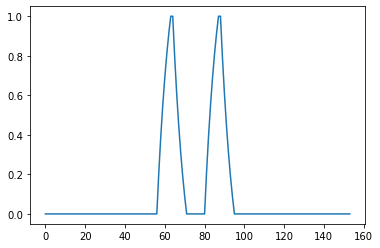

In [94]:
#plt.plot(a)
#plt.plot(b)
plt.plot(c)

In [79]:
import pandas as pd
from sklearn import linear_model

regressors = {'Dot': [], 'OKR': [], 'Loom': []}

X = pd.DataFrame(regressors,columns=['Dot','OKR','Loom'])
Y = neural_activity

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept', regr.intercept_)
print('Coefficient', regr.coef_)


NameError: name 'neural_activity' is not defined

In [98]:
import pandas as pd
from sklearn import linear_model

regressors = {'Dot': a, 'OKR': b, 'Loom': c}

X = pd.DataFrame(regressors,columns=['Dot','OKR','Loom'])
Y = c # neural activity

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept', regr.intercept_)
print('Coefficient', regr.coef_)


Intercept -4.163336342344337e-17
Coefficient [-1.26923266e-16 -4.13592318e-16  1.00000000e+00]
